##Gender Classification using Deep Learning Project

##Done By: Ashwath Bala S

Table of Contents:
1.  Problem Statement
2.  Dataset Description
3.  Importing the Required Libraries
4.  Loading the Dataset, Pre-Processing the Data, Creating Train and Validation Set
5.  Defining the model architecture
6.  Model Compiling
8.  Early Stopping
9.  Model Checkpointing
10. Model Training
11. Evaluating Model Performance
12. Model Analysis
13. Model Evaluation on Test Data

##1. Problem Statement

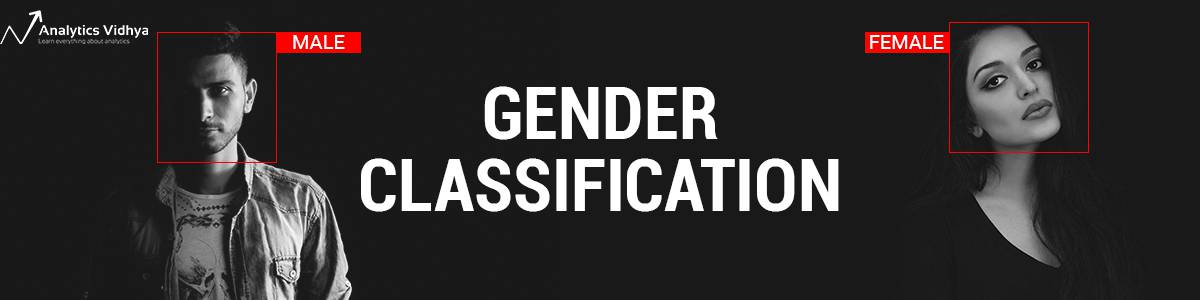


The aim of this project is to build a deep learning model to classify image of individuals, assigning labels of Male (1) or Female (0).
Accuracy is used as the evaluation metric for this project.

##2. Dataset Description

In this project, we have used the following data:

(i) train.zip - Contains a CSV file ("train.csv") and 1 folder containing image data ("images")

(a) train.csv - [‘image_names’, ‘class’] - Contains the image name and correct class for 12196 train images

(b) images (folder) - Contains images for both train and test sets

(ii) test.csv: [‘image_names’] - Contains the image names for 5227 images in the test set

##3. Importing the Required Libraries

In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.initializers import he_normal

##4. Loading the Dataset, Pre-Processing the Data, Creating Train and Validation Set

In [ ]:
# Mounting Google Drive with Colab Environment

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the Dataset, Pre-Processing the Data, Creating Train and Validation Set

# Getting the data

# Path to zip file in Google Drive
zip_file_path = '/content/drive/My Drive/train_dl.zip'

In [ ]:
# Destination directory to extract the files
extracted_path = '/content/drive/My Drive/gender_dl'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

In [ ]:
# Loading the CSV file containing image names and classes
csv_file_path = os.path.join(extracted_path, 'train.csv')  # CSV file name
data = pd.read_csv(csv_file_path)

In [ ]:
# Creating a random seed
seed = 42

In [ ]:
# Gender classification is a binary classfication Problem. So, mentioning "class" as string in order to mention "class_mode=binary", while loading the data in batches

data['class'] = data['class'].astype(str)

In [ ]:
# Image Pre-Processing techniques that we are going to perform, while loading the data in batches

# 1. Image Rescaling
# 2. Image Augmentation

# Following are the Image Augmentation techniques which we are implementing:
# (i)   Image Rotation
# (ii)  Image Shifting
# (iii) Image Flipping
# (iv)  Image Noising
# (v)   Image Blurring

In [ ]:
# Loading the data in batches in order to avoid out-of-memory errors
# (Along with Image Rescaling and Image Augmentation Techniques)
# Creating a Train and Validation Set

# Shuffling the data - So that the model does not learn on the order of the data
data = shuffle(data)

# Splitting the data into train and validation sets
train_data, valid_data = train_test_split(data, test_size=0.2, random_state=42)

# Defining Image Dimensions and batch size
img_height, img_width = 80, 80
batch_size = 128

# Defining ImageDataGenerator for multiple data augmentation techniques
datagen = ImageDataGenerator(
    rescale=1./255,             # Rescaling pixel values between 0 and 1
    rotation_range=30,          # Random rotation in the range of 30 degrees
    width_shift_range=0.2,      # Random horizontal shift by 20% of the width
    height_shift_range=0.2,     # Random vertical shift by 20% of the height
    horizontal_flip=True,       # Random horizontal flipping
    vertical_flip=True,         # Random vertical flipping
    zoom_range=0.2,             # Random zoom by 20%
    shear_range=0.2,            # Random shearing by 20%
    brightness_range=[0.5, 1.5],# Random brightness adjustment between 0.5 to 1.5
    fill_mode='nearest'         # Fill mode for newly created pixels
)

# Creating a generator using flow_from_dataframe method with augmentation
datagen_flow = datagen.flow_from_dataframe(
    data,
    directory='/content/drive/My Drive/gender_dl/images',
    x_col='image_names',  # Column containing the image names
    y_col='class',        # Column containing the class labels
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Creating a generator for training data
train_datagen = datagen.flow_from_dataframe(
    train_data,
    directory='/content/drive/My Drive/gender_dl/images',
    x_col='image_names',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Create a generator for validation data
valid_datagen = datagen.flow_from_dataframe(
    valid_data,
    directory='/content/drive/My Drive/gender_dl/images',
    x_col='image_names',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 12196 validated image filenames belonging to 2 classes.
Found 9756 validated image filenames belonging to 2 classes.
Found 2440 validated image filenames belonging to 2 classes.


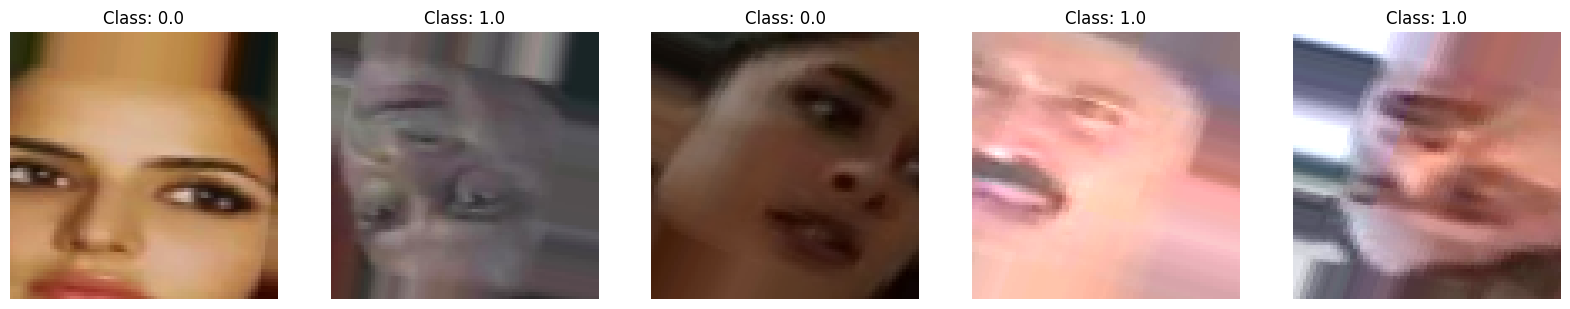

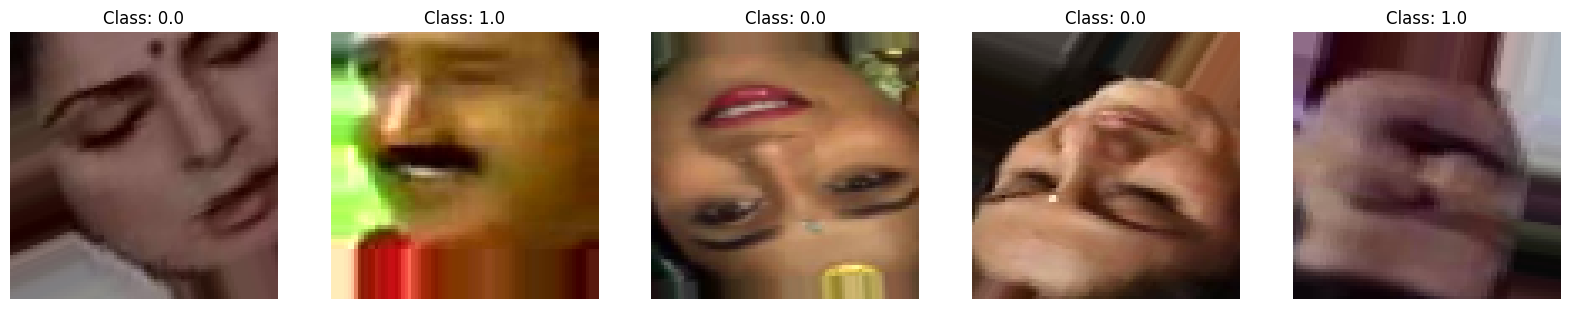

In [ ]:
# Function to display a few images
def display_images(generator, num_images=5):
    # Generating a batch of images and labels
    images, labels = next(generator)

    # Creating subplots
    fig, ax = plt.subplots(1, num_images, figsize=(20, 20))

    # Displaying images
    for i in range(num_images):
        ax[i].imshow(images[i])
        ax[i].axis('off')
        ax[i].set_title(f'Class: {labels[i]}')

# Displaying images from the training set
display_images(datagen_flow)

# Displaying images from the validation set
display_images(valid_datagen)

plt.show()

In [ ]:
# Clearly, we can see that images are loaded accordingly with the classes and Image Augmentation techniques are applied too

##5. Defining Model Architecture

In [ ]:
# Defining Architecture of the model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=he_normal(seed=seed), input_shape=(img_height, img_width, 3)))  # Conv2D Layer with He normal initialization
model.add(MaxPooling2D((2, 2)))                                                                                                    # Max Pooling Layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_normal(seed=seed)))                                          # Conv2D Layer with He normal initialization
model.add(MaxPooling2D((2, 2)))                                                                                                    # Max Pooling Layer
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=he_normal(seed=seed)))                                         # Conv2D Layer with He normal initialization
model.add(MaxPooling2D((2, 2)))                                                                                                    # Max Pooling Layer
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=he_normal(seed=seed)))                                         # Conv2D Layer with He normal initialization
model.add(MaxPooling2D((2, 2)))                                                                                                    # Max Pooling Layer
model.add(Flatten())                                                                                                               # Flatten Layer
model.add(Dense(2048, activation='relu', kernel_initializer=he_normal(seed=seed)))                                                 # Dense Layer with He normal initialization
model.add(Dropout(0.5))                                                                                                            # Dropout Layer
model.add(BatchNormalization())                                                                                                    # Batch Normalization Layer
model.add(Dense(1024, activation='relu', kernel_initializer=he_normal(seed=seed)))                                                 # Dense Layer with He normal initialization
model.add(Dropout(0.5))                                                                                                            # Dropout Layer
model.add(BatchNormalization())                                                                                                    # Batch Normalization Layer
model.add(Dense(1, activation='sigmoid'))                                                                                          # Output Layer

In [ ]:
# Let's have this architecture, such that our model captures data accordingly from previous layers too

In [ ]:
# Summary of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 128)         0

##6. Model Compiling

In [ ]:
# Compiling the Model

# Defining the adam optimizer and setting the learning rate as 10^-5 and adding clip value to clip the gradients
adam = Adam(learning_rate=1e-5, clipvalue=0.5)

In [ ]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

##7. Early Stopping

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, mode='min')

##8. Model Checkpointing

In [ ]:
# Step 7: Model Checkpointing

# Define the filepath for saving the best model weights
checkpoint_filepath = 'best_model.h5'

# Create a ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,    # Save only the model weights
    monitor='val_loss',        # Monitor validation loss
    mode='min',                # Mode can be 'min' or 'max' depending on what you are monitoring
    save_best_only=True,       # Save only the best model (based on the monitored quantity)
    verbose=1                  # Print messages
)

In [ ]:
# Note:

# Model Checkpointing allows us to save the model's weights at certain intervals during training, ensuring we can later use the best-performing model.

##9. Model Training

In [ ]:
model_history = model.fit(
    train_datagen,
    epochs=20,                                          # Considering the complexity of the model, let us not train for more epochs
    steps_per_epoch=len(train_datagen),
    validation_data=valid_datagen,
    validation_steps=len(valid_datagen),
    callbacks=[model_checkpoint, early_stopping]        # Includes Early Stopping and Model Checkpointing
)

Epoch 1/20
77/77 [==============================] - ETA: 0s - loss: 0.5732 - accuracy: 0.6979
Epoch 1: val_loss improved from inf to 0.56719, saving model to best_model.h5
77/77 [==============================] - 71s 923ms/step - loss: 0.5732 - accuracy: 0.6979 - val_loss: 0.5672 - val_accuracy: 0.6984
Epoch 2/20
77/77 [==============================] - ETA: 0s - loss: 0.5499 - accuracy: 0.7218
Epoch 2: val_loss did not improve from 0.56719
77/77 [==============================] - 72s 933ms/step - loss: 0.5499 - accuracy: 0.7218 - val_loss: 0.8092 - val_accuracy: 0.5508
Epoch 3/20
77/77 [==============================] - ETA: 0s - loss: 0.5410 - accuracy: 0.7252
Epoch 3: val_loss improved from 0.56719 to 0.56230, saving model to best_model.h5
77/77 [==============================] - 72s 940ms/step - loss: 0.5410 - accuracy: 0.7252 - val_loss: 0.5623 - val_accuracy: 0.7119
Epoch 4/20
77/77 [==============================] - ETA: 0s - loss: 0.5136 - accuracy: 0.7469
Epoch 4: val_loss did

In [ ]:
# Based on Early Stopping, Model stopped at 14th Epoch, since it is not improved after the specified patience.
# But, one thing we can notice is, even though it is trained for 14 Epochs, since due to the architecture, it's performance is good, based on accuracy

# Reason for having 4 Epochs: Based on several trials, on 3, it is underfitting and increased to 5, it takes more epochs
# So, to have a exact model, 4 seems to be the right value for patience

##10. Evaluating the Model Performance

In [ ]:
# Evaluating the model on the training set and validation set
training_loss, training_accuracy = model.evaluate(train_datagen, steps=len(train_datagen))
validation_loss, validation_accuracy = model.evaluate(valid_datagen, steps=len(valid_datagen))

# Printing the Results
print('Accuracy on training set :', training_accuracy * 100, '%')
print('Accuracy on validation set :', validation_accuracy * 100, '%')

20/20 [==============================] - 14s 676ms/step - loss: 0.3842 - accuracy: 0.8225
Accuracy on training set : 83.96884202957153 %
Accuracy on validation set : 82.25409984588623 %


In [ ]:
# Model Checkpointing

# Loading the best model
model.load_weights(checkpoint_filepath)

In [ ]:
# Evaluating the best model saved on the training set and validation set
training_loss, training_accuracy = model.evaluate(train_datagen, steps=len(train_datagen))
validation_loss, validation_accuracy = model.evaluate(valid_datagen, steps=len(valid_datagen))

# Printing the Results
print('Accuracy on training set :', training_accuracy * 100, '%')
print('Accuracy on validation set :', validation_accuracy * 100, '%')

20/20 [==============================] - 14s 690ms/step - loss: 0.3564 - accuracy: 0.8393
Accuracy on training set : 83.90734195709229 %
Accuracy on validation set : 83.93442630767822 %


##11. Model Analysis

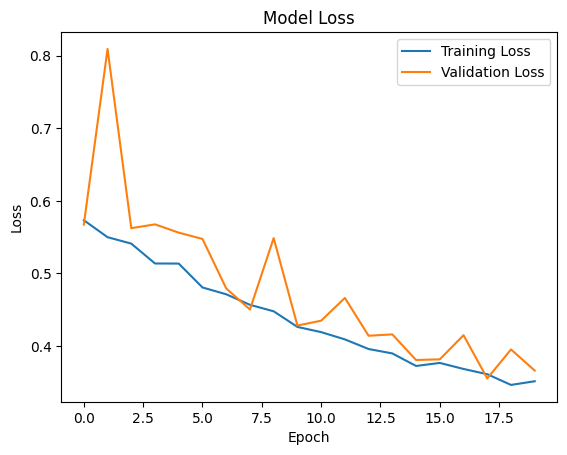

In [ ]:
# Accessing training history
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# Plotting training and validation losses
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Conclusion:

# We can see near 12th Epoch, Validation loss has increased and decreased, but training loss seems to be getting lower further.
# If that is the case, moving to further epochs the model starts to overfit. (Extremely perform on train data, starts to memorize, but underperform on unseen data)
# That's what Early stopping does and helps us to find the right model

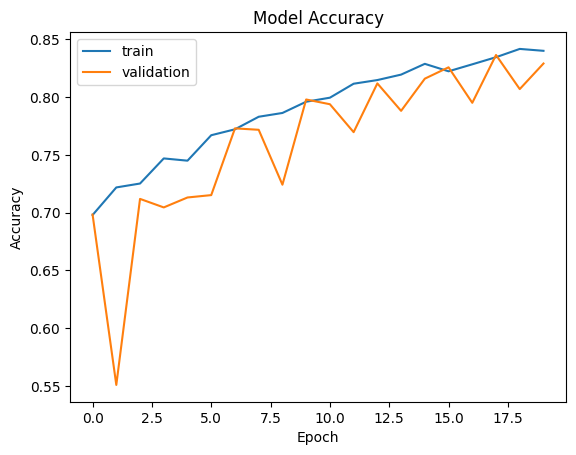

In [ ]:
# Plot history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Conclusion:

# Same way for accuracy, the model may starts to overfit.
# Early stopping helped us to find the right model

##12. Model Evaluation on Test Data

In [ ]:
# Loading test CSV file
test_csv_path = '/content/drive/My Drive/test_dl.csv'
test_data = pd.read_csv(test_csv_path)

# Creating a generator for test data
test_datagen = datagen.flow_from_dataframe(
    test_data,
    directory='/content/drive/My Drive/gender_dl/images',
    x_col='image_names',
    y_col=None,  # Since this is for test data, y_col can be None
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode=None,  # Setting to None since this is for test data
    shuffle=False  # Important: Not shuffling test data
)

# Making predictions on the test data
predictions = model.predict(test_datagen)

# Since having binary classification, converting probabilities to class labels
predicted_classes = (predictions > 0.5).astype(int)

Found 5227 validated image filenames.
41/41 [==============================] - 30s 726ms/step


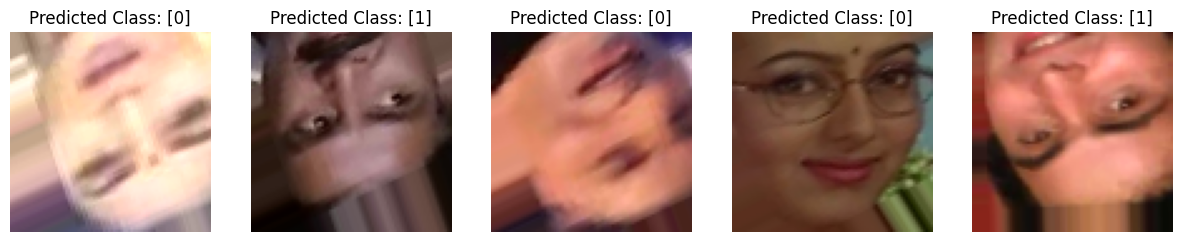

In [ ]:
# A Function to display images along with predicted classes
def visualize_predictions(generator, predictions, num_images=5):
    # Generating a batch of images
    images = next(generator)

    # Creating subplots
    fig, ax = plt.subplots(1, num_images, figsize=(15, 15))

    # Displaying images with predicted labels
    for i in range(num_images):
        ax[i].imshow(images[i])
        ax[i].axis('off')
        ax[i].set_title(f'Predicted Class: {predictions[i]}')

# Visualizing predictions on the test data
visualize_predictions(test_datagen, predicted_classes, num_images=5)
plt.show()

In [ ]:
# Final Conclusion:

# We can see that our model is performing good and predciting accurately.
# Dataset is loaded in batches, to avoid out of memory errors
# Image rescaling and Augmentation techniques are performed
# Droput and batch normalization layers are added
# Optimal weight initializers, regularizers and activation functions are used accordingly
# Early Stopping is implemented in order to avoid overfitting

##In this Project, we have built a deep learning model for gender classification and implemented several deep learning techniques to improve the model performance